Example 1: Prior mean less than observed value


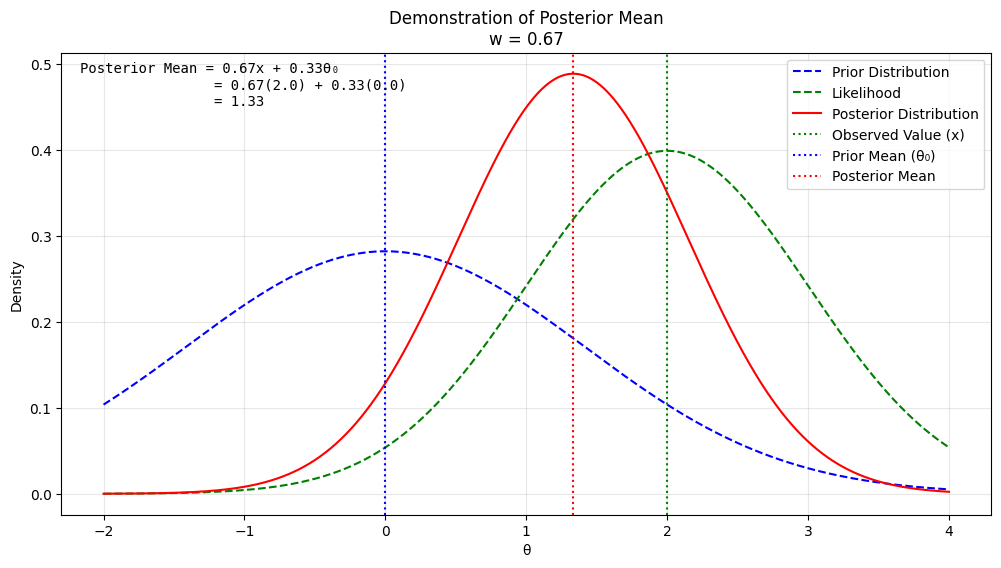


Example 2: Prior mean greater than observed value


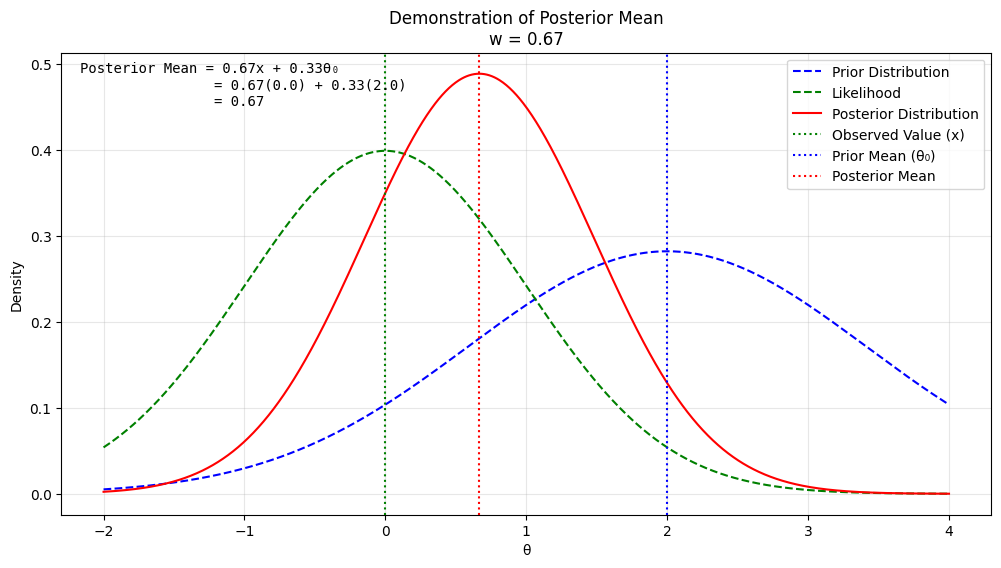


Example 3: More weight on prior due to smaller prior variance


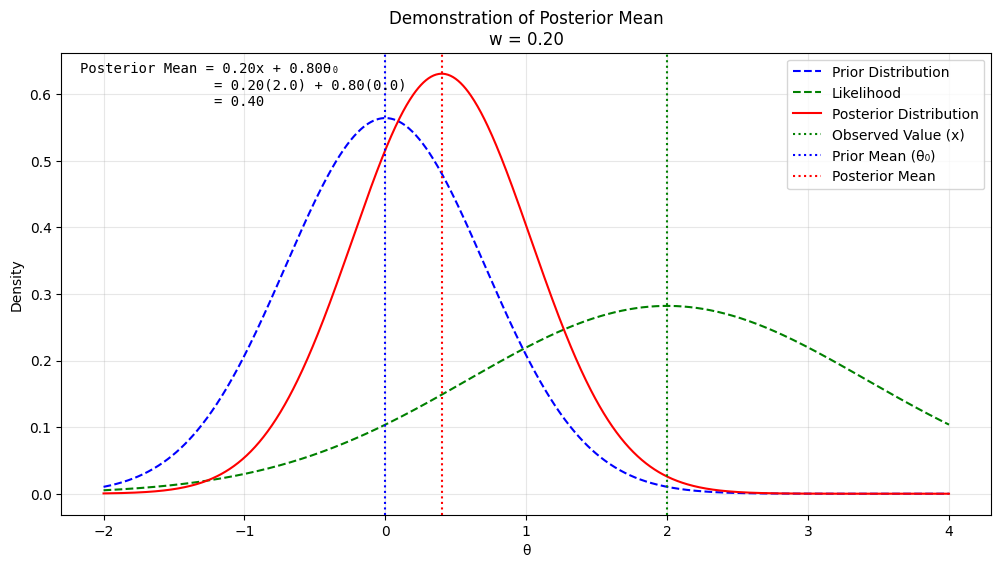

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def calculate_posterior_mean(x, theta_0, phi, phi_0):
    """
    Calculate the posterior mean given:
    x: observed value
    theta_0: prior mean
    phi: likelihood variance
    phi_0: prior variance
    """
    weight = (1/phi) / (1/phi + 1/phi_0)
    posterior_mean = weight * x + (1 - weight) * theta_0
    return posterior_mean, weight

def plot_posterior_mean_demonstration(x, theta_0, phi, phi_0):
    """
    Create a visual demonstration of how posterior mean lies between x and theta_0
    """
    posterior_mean, weight = calculate_posterior_mean(x, theta_0, phi, phi_0)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot the distributions
    theta_range = np.linspace(min(x, theta_0) - 2, max(x, theta_0) + 2, 1000)
    
    # Prior distribution
    prior = norm.pdf(theta_range, theta_0, np.sqrt(phi_0))
    plt.plot(theta_range, prior, 'b--', label='Prior Distribution')
    
    # Likelihood
    likelihood = norm.pdf(theta_range, x, np.sqrt(phi))
    plt.plot(theta_range, likelihood, 'g--', label='Likelihood')
    
    # Posterior distribution
    posterior_var = 1/(1/phi + 1/phi_0)
    posterior = norm.pdf(theta_range, posterior_mean, np.sqrt(posterior_var))
    plt.plot(theta_range, posterior, 'r-', label='Posterior Distribution')
    
    # Add vertical lines for key values
    plt.axvline(x=x, color='g', linestyle=':', label='Observed Value (x)')
    plt.axvline(x=theta_0, color='b', linestyle=':', label='Prior Mean (θ₀)')
    plt.axvline(x=posterior_mean, color='r', linestyle=':', label='Posterior Mean')
    
    plt.title(f'Demonstration of Posterior Mean\nw = {weight:.2f}')
    plt.xlabel('θ')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add text showing the weighted average calculation
    text = f'Posterior Mean = {weight:.2f}x + {1-weight:.2f}θ₀\n'
    text += f'                = {weight:.2f}({x:.1f}) + {1-weight:.2f}({theta_0:.1f})\n'
    text += f'                = {posterior_mean:.2f}'
    plt.text(0.02, 0.98, text, transform=plt.gca().transAxes, 
            verticalalignment='top', fontfamily='monospace')
    
    plt.show()

# Example 1: Prior mean less than observed value
print("Example 1: Prior mean less than observed value")
plot_posterior_mean_demonstration(x=2.0, theta_0=0.0, phi=1.0, phi_0=2.0)

# Example 2: Prior mean greater than observed value
print("\nExample 2: Prior mean greater than observed value")
plot_posterior_mean_demonstration(x=0.0, theta_0=2.0, phi=1.0, phi_0=2.0)

# Example 3: Different variances affecting the weights
print("\nExample 3: More weight on prior due to smaller prior variance")
plot_posterior_mean_demonstration(x=2.0, theta_0=0.0, phi=2.0, phi_0=0.5)